In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Rescaling, Input, Dropout
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

In [4]:
IMG_SIZE = 160
BATCH_SIZE = 32
FILE_PATH = r'D:\Cotton leaves\40 Images'
CLASSES = os.listdir(FILE_PATH)
SEED = 123

# Training dataset
train_ds = image_dataset_from_directory(
    FILE_PATH,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASSES,
    image_size=(IMG_SIZE, IMG_SIZE),
    seed=SEED,
    validation_split=0.2,
    subset="training",
    crop_to_aspect_ratio=True
)

# validation (test) dataset
val_ds = image_dataset_from_directory(
    FILE_PATH,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASSES,
    image_size=(IMG_SIZE, IMG_SIZE),
    seed=SEED,
    validation_split=0.2,
    subset="validation",
    crop_to_aspect_ratio=True
)

Found 4788 files belonging to 6 classes.
Using 3831 files for training.
Found 4788 files belonging to 6 classes.
Using 957 files for validation.


In [5]:
normalization_layer = Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = models.Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(CLASSES), activation='softmax')
])


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 100s 790ms/step - accuracy: 0.3321 - loss: 1.6584 - val_accuracy: 0.5152 - val_loss: 1.2117
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 646ms/step - accuracy: 0.5864 - loss: 1.1129 - val_accuracy: 0.7179 - val_loss: 0.7628
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 647ms/step - accuracy: 0.7160 - loss: 0.7947 - val_accuracy: 0.7931 - val_loss: 0.5775
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 647ms/step - accuracy: 0.7932 - loss: 0.5921 - val_accuracy: 0.7973 - val_loss: 0.5774
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 666ms/step - accuracy: 0.8576 - loss: 0.4245 - val_accuracy: 0.8464 - val_loss: 0.4649
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 638ms/step - accuracy: 0.8774 - loss: 0.3409 - val_accuracy: 0.8558 - val_loss: 0.4824
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 626ms/step - accuracy: 0.8940 - loss: 0.3126 - val_accuracy: 0.8422 - val_loss: 0.5609
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 649ms/step - accuracy: 0.9311 - loss: 

In [11]:
model.evaluate(val_ds)

# Save the trained model
model.save("image_classifier_model.h5")


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.8406 - loss: 0.6124


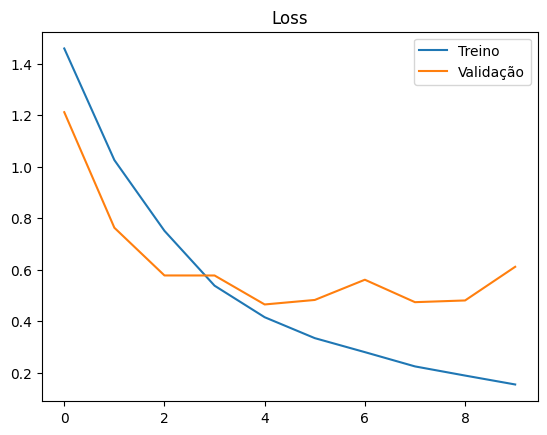

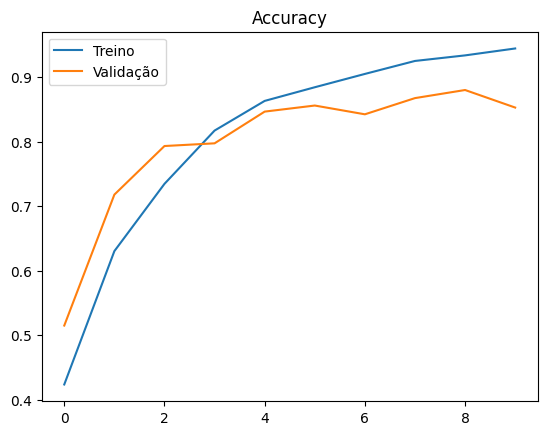

In [10]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Accuracy')
plt.legend()
plt.show()
